# Long/Short Methodologies: Absolute and Relative


Absolute series are the Open High Low Close (OHLC) prices we can see on any platform. They often come either adjusted for dividends, stock splits, and other corporate actions. Relative series are the above absolute series divided by the closing price of the benchmark, adjusted for currency.

We hope to demonstrate the weaknesses of the absolute method, and strengths of the relative weakness method, which will define our methodology.

# Long/Short : The Absolute Method

The absolute method makes intuitive sense: buy stocks that go up, short stocks that go down. There is a one-to-one relationship between data coming from various providers, price charts on the screen, and what goes into the portfolio. Everybody speaks the same language. Shorting stocks that go down in absolute value generates cash that can be used to buy additional stocks on the long side and increase leverage.
The hope is to generate positive returns regardless of market direction (hence "absolute").

# Why Doesn’t It Work as Promised?
1. ## In Bull Markets (when most stocks rise):
Shorting becomes very hard: Since few stocks are falling, the few that do become overcrowded with short sellers.

These "crowded shorts" are:

*   Illiquid (hard to trade in size without moving the price)
*   Expensive (borrow fees go up), risky (prone to violent short squeezes)


Result: Fund managers limit their short positions to avoid risk, they’re heavily net long (more invested in stocks going up than down), which is just like betting on the market to go up.

Intuition: Even though the strategy says it's "market neutral," it's actually bullish because of the structural imbalance between long and short positions.

2. ## In Bear Markets (when most stocks fall):

Good short opportunities abound, but:
Long positions still exist (and drop in value).
Short positions are often not large enough to offset long losses.

Even with good short calls, net exposure rarely turns negative (more short than long).

Investors still lose money, just not as much.

Intuition: You protect yourself somewhat but you’re still bleeding.

What’s the Core Issue?
The strategy fails to remain neutral or negative correlated with the market:

In up markets: the fund behaves like a long-only fund.
In down markets: it cushions losses, but still takes hits.

This defeats the purpose of an absolute return hedge fund, which is supposed to make money regardless of market direction, and justifies high fees for being “uncorrelated.”

In [1]:
pip install yfinance

In [2]:

import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline
import matplotlib.pyplot as plt

### S&P500 stocks making 1 year high (bullish)/ low (bearish) in absolute/relative series
The following chart shows the S&P 500 index and a count of all the constituents in either the bull or bear regime using the absolute price series.

Indices such as S&P 500, Nasdaq 100, FTSE 100, and Topix are the market capitalization weighted average of their constituents. Roughly half the stocks will do better and the rest worse than the index over any timeframe.

['^GSPC', 'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL'] 0 20


[*********************100%***********************]  20 of 20 completed


['GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'APO'] 20 40


[*********************100%***********************]  20 of 20 completed


['AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BAX'] 40 60


[*********************100%***********************]  20 of 20 completed


['BDX', 'BRK-B', 'BBY', 'TECH', 'BIIB', 'BLK', 'BX', 'BK', 'BA', 'BKNG', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'BLDR', 'BG', 'BXP', 'CHRW'] 60 80


[*********************100%***********************]  20 of 20 completed


['CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CAT', 'CBOE', 'CBRE', 'CDW', 'COR', 'CNC', 'CNP', 'CF', 'CRL', 'SCHW', 'CHTR'] 80 100


[*********************100%***********************]  20 of 20 completed


['CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'COIN', 'CL', 'CMCSA', 'CAG', 'COP'] 100 120


[*********************100%***********************]  20 of 20 completed


['ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CRWD', 'CCI', 'CSX', 'CMI', 'CVS', 'DHR', 'DRI', 'DVA', 'DAY'] 120 140


[*********************100%***********************]  20 of 20 completed


['DECK', 'DE', 'DELL', 'DAL', 'DVN', 'DXCM', 'FANG', 'DLR', 'DG', 'DLTR', 'D', 'DPZ', 'DASH', 'DOV', 'DOW', 'DHI', 'DTE', 'DUK', 'DD', 'EMN'] 140 160


[*********************100%***********************]  20 of 20 completed


['ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ERIE', 'ESS', 'EL', 'EG'] 160 180


[*********************100%***********************]  20 of 20 completed


['EVRG', 'ES', 'EXC', 'EXE', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FICO', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FI', 'F'] 180 200


[*********************100%***********************]  20 of 20 completed


['FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GE', 'GEHC', 'GEV', 'GEN', 'GNRC', 'GD', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GL'] 200 220


[*********************100%***********************]  20 of 20 completed


['GDDY', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'DOC', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUBB'] 220 240


[*********************100%***********************]  20 of 20 completed


['HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'INCY', 'IR', 'PODD', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV'] 240 260


[*********************100%***********************]  20 of 20 completed
[                       0%                       ]

['IRM', 'JBHT', 'JBL', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KVUE', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KKR', 'KLAC', 'KHC'] 260 280


[*********************100%***********************]  20 of 20 completed


['KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LII', 'LLY', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LULU', 'LYB', 'MTB', 'MPC'] 280 300


[*********************100%***********************]  20 of 20 completed


['MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA'] 300 320


[*********************100%***********************]  20 of 20 completed


['MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE'] 320 340


[*********************100%***********************]  20 of 20 completed


['NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OTIS', 'PCAR'] 340 360


[*********************100%***********************]  20 of 20 completed


['PKG', 'PLTR', 'PANW', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG'] 360 380


[*********************100%***********************]  20 of 20 completed


['PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD'] 380 400


[*********************100%***********************]  20 of 20 completed


['RVTY', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SJM', 'SW', 'SNA', 'SOLV'] 400 420


[*********************100%***********************]  20 of 20 completed


['SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SMCI', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY'] 420 440


[*********************100%***********************]  20 of 20 completed


['TER', 'TSLA', 'TXN', 'TPL', 'TXT', 'TMO', 'TJX', 'TKO', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UBER', 'UDR', 'ULTA'] 440 460


[*********************100%***********************]  20 of 20 completed


['UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VLTO', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VTRS', 'VICI', 'V', 'VST', 'VMC', 'WRB', 'GWW'] 460 480


[*********************100%***********************]  20 of 20 completed


['WAB', 'WBA', 'WMT', 'DIS', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WY', 'WSM', 'WMB', 'WTW', 'WDAY', 'WYNN', 'XEL', 'XYL'] 480 500


[*********************100%***********************]  20 of 20 completed


['YUM', 'ZBRA', 'ZBH', 'ZTS'] 500 520


[*********************100%***********************]  4 of 4 completed
<ipython-input-19-11e8915e06a9>:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_rel = round(df_abs.divide(df_abs[bm_ticker], axis=0).mul(df_abs[bm_ticker][0]),1)
<ipython-input-19-11e8915e06a9>:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index=df_rel.index,columns=df_rel.columns).fillna(method='ffill')
<ipython-input-19-11e8915e06a9>:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  index=df_abs.index,columns=df_abs.columns).fillna(method='ffill')


<Axes: title={'center': 'S&P500, 1yr High/Low count: absolute & relative series'}, xlabel='Date'>

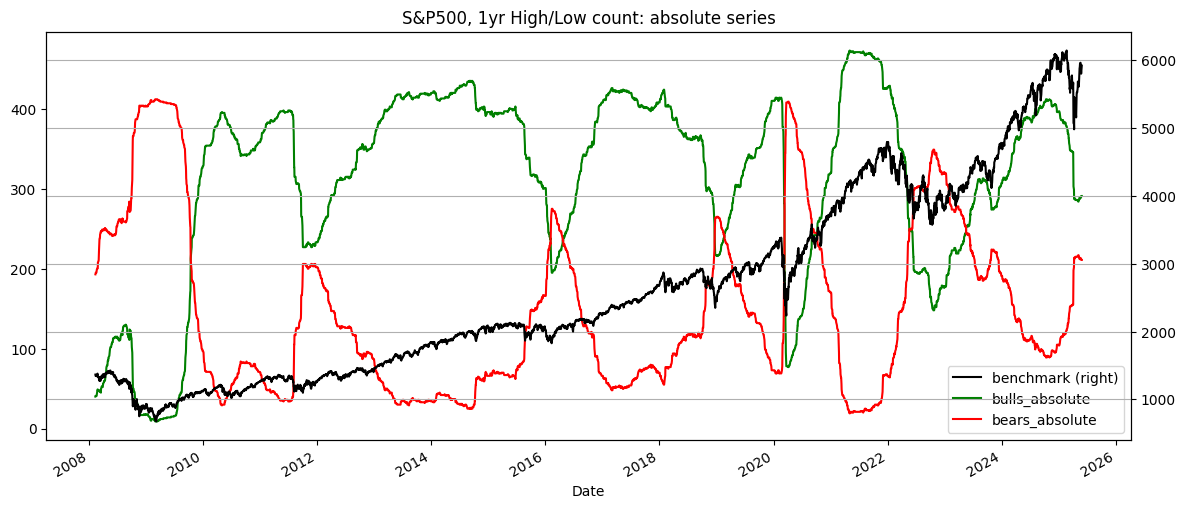

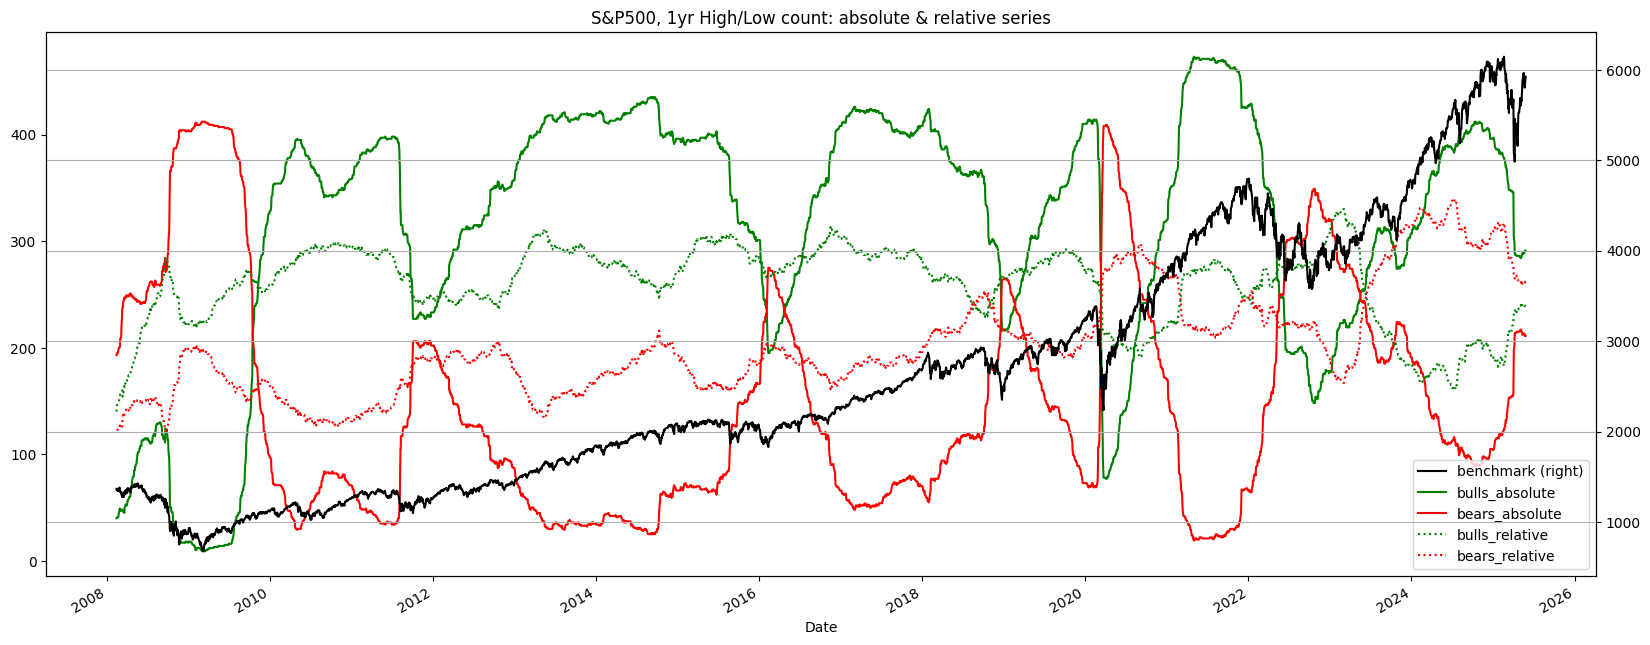

In [19]:
import yfinance as yf
# S&P500 dataframe: list of tickers
sp_df = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp_df['Symbol'] = sp_df['Symbol'].str.replace('.', '-')
bm_ticker = '^GSPC'
tickers_list = [bm_ticker] + list(sp_df['Symbol'])[:]

# Variables instantiation
window = 252
show_batch = True
df_abs = pd.DataFrame()
batch_size = 20
loop_size = int(len(tickers_list) // batch_size) + 2

for t in range(1,loop_size): # Batch download
    m = (t - 1) * batch_size
    n = t * batch_size
    batch_list = tickers_list[m:n]
    print(batch_list,m,n)
    batch_download = yf.download(tickers= batch_list,start= '2007-01-01', end = None,
                        interval = "1d",group_by = 'column',auto_adjust = True,
                              prepost = True, threads = True, proxy = None)['Close']
    df_abs = df_abs.join(batch_download, how='outer')

bullbear = pd.DataFrame()
bullbear['benchmark'] = round(df_abs[bm_ticker].copy(),2)
df_rel = round(df_abs.divide(df_abs[bm_ticker], axis=0).mul(df_abs[bm_ticker][0]),1)
df_rel = pd.DataFrame(data=np.where(df_rel >= df_rel.rolling(window).max(),1,
        np.where(df_rel <= df_rel.rolling(window).min(),-1,np.nan)),
            index=df_rel.index,columns=df_rel.columns).fillna(method='ffill')
df_abs = pd.DataFrame(data=np.where(df_abs >= df_abs.rolling(window).max(),1,
        np.where(df_abs<=df_abs.rolling(window).min(),-1,np.nan)),
            index=df_abs.index,columns=df_abs.columns).fillna(method='ffill')

bullbear['bulls_absolute'] = df_abs[df_abs > 0].count(axis=1)
bullbear['bears_absolute'] = df_abs[df_abs < 0].count(axis=1)
bullbear['bulls_relative'] = df_rel[df_rel > 0].count(axis=1)
bullbear['bears_relative'] = df_rel[df_rel < 0].count(axis=1)

bullbear[280:][['benchmark','bulls_absolute', 'bears_absolute',
               ]].plot(figsize=(14,6),
                style=['k', 'g', 'r'],grid=True,secondary_y=['benchmark'],
                title = 'S&P500, 1yr High/Low count: absolute series' )

bullbear[280:][['benchmark','bulls_absolute', 'bears_absolute', 'bulls_relative', 'bears_relative']].plot(figsize=(20,8),
                style=['k', 'g', 'r','g:', 'r:'],grid=True,secondary_y=['benchmark'],
                title = 'S&P500, 1yr High/Low count: absolute & relative series')

### Relative function

When the market goes up, the number of bullish stocks rises. When the market turns sideways or bearish, the number of stocks in bearish territory rises. This demonstrates that the absolute method is by definition correlated to the markets. It should suffice to look at the track record of long/short funds to conclude that the absolute method has failed to deliver uncorrelated attractive returns.



## Ineffective at reducing volatility
Since the short side has fewer ideas than the other, the way to balance exposures is to supersize the more concentrated book. This translates into a diluted, relatively low volatility long portfolio and a few concentrated "structural short" bets. Crowded shorts are illiquid and therefore more prone to volatility spikes. There is no shortage of sellers, but courageous buyers are scarce.

Note: Volatility on the short side drives the entire portfolio. Underwhelming performance divided by high residual volatility only yields unattractive volatility adjusted returns.

## Lesser investment vehicle
The absolute method has earned its existential crisis. It is neither a sophisticated, nor a safe investment vehicle. It is a lesser vehicle in every single respect. It makes less money than mutual funds and index funds in bull markets. It only loses less money than the index in bear markets. After fees, investors compound less money with the absolute method than they would with low-tech plain-vanilla index funds. There is less transparency and less liquidity than in classical mutual funds. It is therefore little surprise that those funds have failed to attract and retain pension money looking for stable, uncorrelated returns.

Laggard Indicator: The bottom line is, by the time those stocks pop up on people's radar screens, they have already shed a lot of value. In an industry where creative colorful insults are an occupational pastime, few zingers sting as much as being called a laggard indicator.

## Conclusion:
The absolute method in long/short investing fails to provide the uncorrelated, downside-protective, and risk-adjusted returns that investors expect despite charging high fees.

Breakdown of the Key Issues:

### High Correlation to the Benchmark

Investors pay for uncorrelated performance returns that don’t move with the S&P 500 or other benchmarks.

But the absolute method is structurally correlated:

In bull markets, it behaves like a long-only fund (high positive net exposure).

In bear markets, it can’t or won’t go meaningfully net short.

So, it wins when the market wins, and loses when the market loses, just less sharply.

Bottom line: It doesn’t justify hedge fund fees if it's just a softer version of the market.

# Long/Short: The Relative Weakness Method

The relative weakness method takes a similar approach. A long/short portfolio is the net sum of two relative books. The long side is a classic mutual fund-type long book. The short side is composed of underperformers benchmarked to the inverse of the index. The only difference with a mutual fund is instead of staying away from underperformers, managers take active bets on the short side. Performance comes from the spread between outperformance on the long side and underperformance on the short. Below is a simple example. General Electric, General Motors, and Goldman Sachs are in three different industries.

In [20]:


### RELATIVE
def relative(df,_o,_h,_l,_c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end,rebase=True):
    '''
    df: df
    bm_df, bm_col: df benchmark dataframe & column name
    ccy_df,ccy_col: currency dataframe & column name
    dgt: rounding decimal
    start/end: string or offset
    rebase: boolean rebase to beginning or continuous series
    '''
    # Slice df dataframe from start to end period: either offset or datetime
    df = df[start:end]

    # inner join of benchmark & currency: only common values are preserved
    df = df.join(bm_df[[bm_col]],how='inner')
    df = df.join(ccy_df[[ccy_col]],how='inner')

    # rename benchmark name as bm and currency as ccy
    df.rename(columns={bm_col:'bm', ccy_col:'ccy'},inplace=True)

    # Adjustment factor: calculate the scalar product of benchmark and currency
    df['bmfx'] = round(df['bm'].mul(df['ccy']),dgt).fillna(method='ffill')
    if rebase == True:
        df['bmfx'] = df['bmfx'].div(df['bmfx'][0])

    # Divide absolute price by fxcy adjustment factor and rebase to first value
    df['r' + str(_o)] = round(df[_o].div(df['bmfx']),dgt)
    df['r' + str(_h)] = round(df[_h].div(df['bmfx']),dgt)
    df['r'+ str(_l)] = round(df[_l].div(df['bmfx']),dgt)
    df['r'+ str(_c)] = round(df[_c].div(df['bmfx']),dgt)
    df = df.drop(['bm','ccy','bmfx'],axis=1)

    return (df)

### RELATIVE ###



### Softbank in absolute JPY & relative to Nasdaq in USD

Softbank (9984.T) is a company listed on the Tokyo Stock Exchange (TSE). It trades in Japanese yen. The company has been a major player in the US tech industry for almost three decades. Softbank will be benchmarked against Nasdaq in USD.  Softbank has been a powerhouse on the TSE since telephones have enchained mankind. Yet, Softbank has been a lackluster performer when benchmarked against the Nasdaq index and labelled in USD.

The concept is simple: buy the outperformers, sell short the underperformers, make money on the spread. The idea of focusing on the excess returns over the index is nothing new. Mutual funds managers are assessed on their outperformance over the benchmark. When focusing on only the long side, the mission is to overweigh outperformers and underweigh underperformers. The difference in weight over the benchmark is called "active money."

Same data, but the relative series is not rebased to the beginning of the series

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


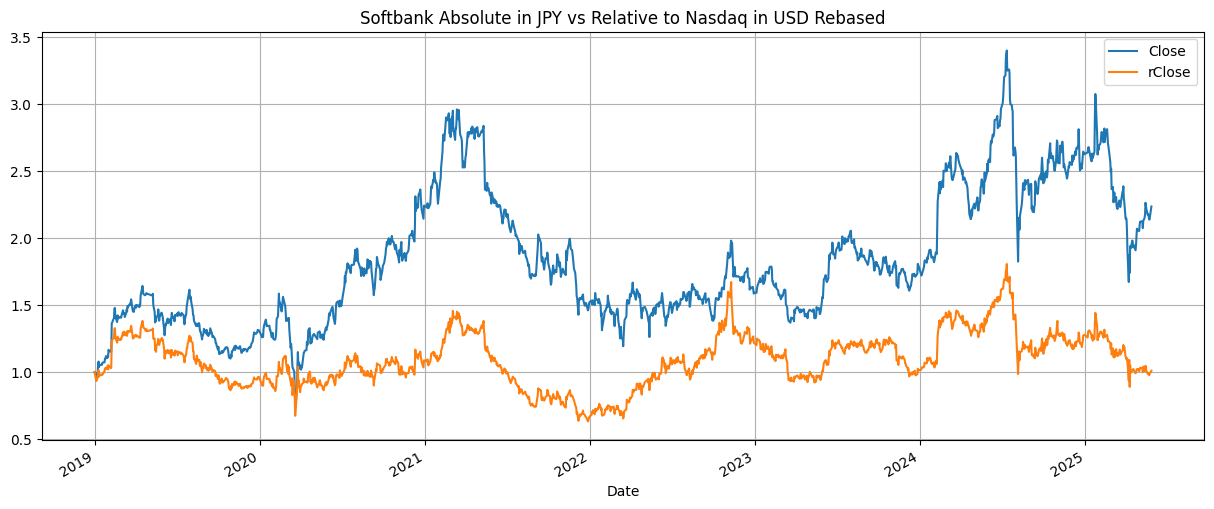

In [48]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker = '9984.T'  # Softbank
ohlc = ['Open', 'High', 'Low', 'Close']
_o, _h, _l, _c = [ohlc[h] for h in range(len(ohlc))]
start = '2018-12-30'
end = None
dgt = 5

df = round(yf.download(tickers=ticker, start=start, end=end,
                       interval="1d", group_by='column', auto_adjust=True,
                       prepost=True, threads=True, proxy=None), 2)

# Flatten columns
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Benchmark
bm_df = pd.DataFrame()
bm_ticker = '^IXIC'
bm_col = 'nasdaq'
bm_df[bm_col] = yf.download(tickers=bm_ticker, start=start, end=end,
                            interval="1d", group_by='column', auto_adjust=True,
                            prepost=True, threads=True, proxy=None)['Close']

# Currency
ccy_df = pd.DataFrame()
ccy_ticker = 'USDJPY=X'
ccy_col = 'JPY'
ccy_df[ccy_col] = yf.download(tickers=ccy_ticker, start=start, end=end,
                              interval="1d", group_by='column', auto_adjust=True,
                              prepost=True, threads=True, proxy=None)['Close']

# Relative function
def relative(df, o, h, l, c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end, rebase=True):
    close_df = df[[c]].copy()
    close_df.columns = ['Close']  # normalize column name
    merged = close_df.merge(bm_df, left_index=True, right_index=True)
    merged = merged.merge(ccy_df, left_index=True, right_index=True)
    merged['rClose'] = (merged['Close'] / merged[bm_col]) * merged[ccy_col]
    if rebase:
        merged['Close'] = merged['Close'] / merged['Close'].iloc[0]
        merged['rClose'] = merged['rClose'] / merged['rClose'].iloc[0]
    return merged

# Apply
df = relative(df, _o, _h, _l, _c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end, rebase=True)

# Plot
df[['Close', 'rClose']].plot(figsize=(15, 6), grid=True,
                             title='Softbank Absolute in JPY vs Relative to Nasdaq in USD Rebased')
plt.show()


<Axes: title={'center': 'Softbank Absolute in JPY vs relative to Nasdaq in USD'}, xlabel='Date'>

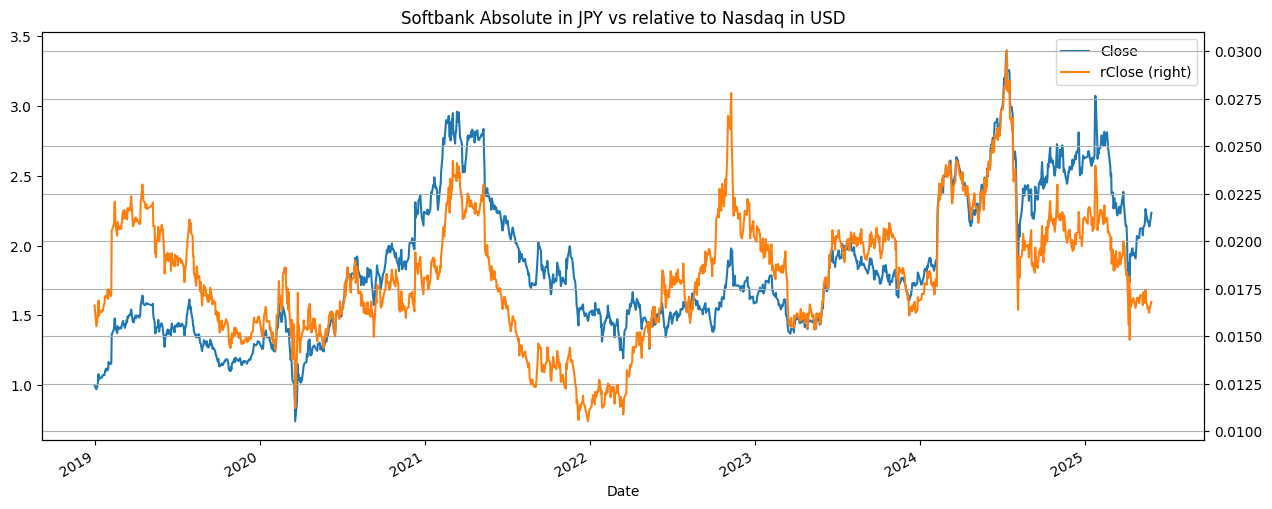

In [49]:

df2 = relative(df,_o,_h,_l,_c, bm_df, bm_col, ccy_df, ccy_col, dgt, start, end,rebase=False)
df2[['Close','rClose']].plot(figsize=(15,6),grid=True,secondary_y= 'rClose',
            title= 'Softbank Absolute in JPY vs relative to Nasdaq in USD' )

The relative weakness method takes a similar approach. A long/short portfolio is the net sum of two relative books. The long side is a classic mutual fund-type long book. The short side is composed of underperformers benchmarked to the inverse of the index. The only difference with a mutual fund is instead of staying away from underperformers, managers take active bets on the short side. Performance comes from the spread between outperformance on the long side and underperformance on the short. Below is a simple example. General Electric, General Motors, and Goldman Sachs are in three different industries.

### Comparison of three stocks across 3 different sectors


### Wells Fargo 1 year before the scandal in absolute and relative

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-52-ca000dfdcab3>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gems['rel_'+ticker] = gems[ticker].div(benchmark * gems[ticker][0]) * benchmark[0]
[*********************100%***********************]  1 of 1 completed
<ipython-input-52-ca000dfdcab3>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gems['rel_'+ticker] = gems[ticker].div(benchmark * gems[ticker][0]) * benchmark[0]
[*********************100%***********************]  1 of 1 completed
<ipython-input-52-

<Axes: title={'center': 'GEMS Absolute Prices vs Relative Series'}, xlabel='Date'>

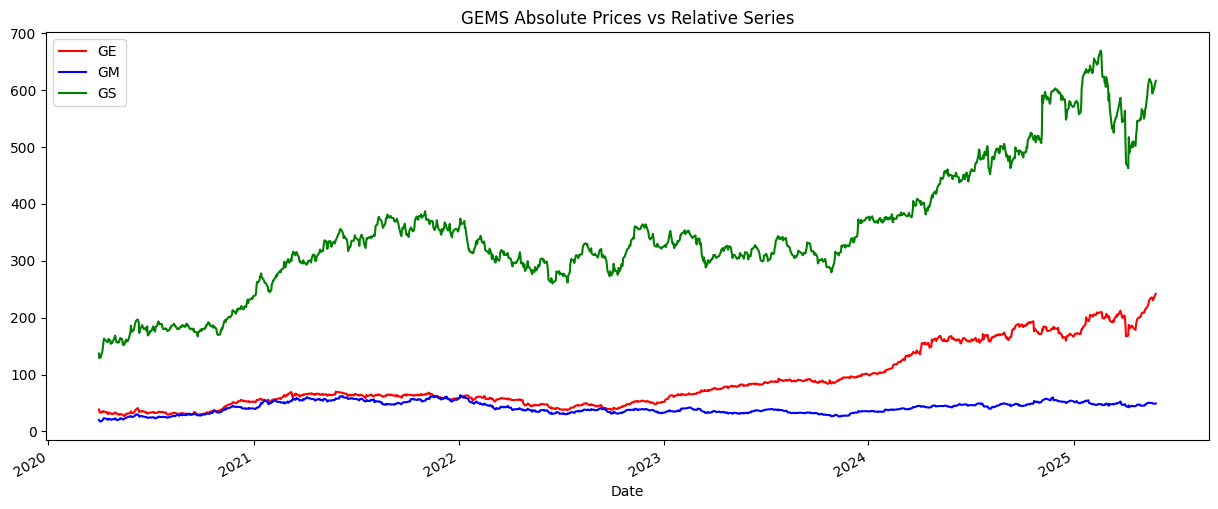

In [52]:


tickers_list = ['GE','GM','GS']

# Dataframes instantiation
gems = pd.DataFrame()
start = '2020-03-31'
benchmark = yf.download(tickers= '^GSPC',start= start, end = None,
                        interval = "1d",group_by = 'column',auto_adjust = True,
                              prepost = True, threads = True, proxy = None)['Close']
failed = []
rel_ticker_list = []
for n,ticker in enumerate(tickers_list):
    try: #7 Download & process data
        gems[ticker] = yf.download(tickers= ticker,start= start, end = None,
                        interval = "1d",group_by = 'column',auto_adjust = True,
                              prepost = True, threads = True, proxy = None)['Close']
        gems['rel_'+ticker] = gems[ticker].div(benchmark * gems[ticker][0]) * benchmark[0]
        rel_ticker_list.append('rel_'+ticker)
    except:
        failed.append(ticker)
gems = gems[tickers_list+rel_ticker_list]
gems.plot(figsize= (15,6),secondary_y= rel_ticker_list,style=['r','b','g','r:','b:','g:'],
          title= 'GEMS Absolute Prices vs Relative Series' )

The chart illustrates that relative series are a bit more indicative of a stock's relative strength compared to the market. Prices are restarted versus the benchmark at the beginning of the period, but they provide uniform series across sectors. At first, it may seem unnatural to enter a short position on a rising stock. Losing money does not come naturally to absolute return players. To understand the concept, let's reframe it by picturing what happens in a bear market. When the big bear pounds the market, nothing goes up. This means that we'll be looking to buy long defensive stocks that hold their ground or fall slower than the broader index. We will be losing less than the market on the long side. Typically you would be buying non-cyclical utilities, railways, or food stocks.

Conversely, we will be looking to short stocks that drop faster than the benchmark. Those tend to be cyclical stocks for which performance ebbs and flows with the economic cycle, such as airline companies. By the way, you can keep the darlings of the previous bull markets in your portfolio, but remember to switch sides. Leaders of bull markets tend to attract late-cycle momentum players. Those are the weakest market participants, late to the game, with no real game plan. They bail as soon as the going gets tough, which leads to sudden performance disgorgement. The relative series open a whole new world of possibilities compared with the classic absolute method.